# Afrobeats Recommender

# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

import plotly.express as px
import time

#### EDA with Jacks Playlist

In [4]:
ankita= pd.read_csv('../data/ankita.csv')
ankita.head(2)

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,068HSvCf5MbQfhV4qqaelg,"Haan Main Galat (From ""Love Aaj Kal"")",Pritam,{'external_urls': {'spotify': 'https://open.sp...,1wRPtKGflJrBx9BmLsSwlU,84,"['desi pop', 'filmi', 'indian instrumental', '...","Haan Main Galat (From ""Love Aaj Kal"")",63,0.685,...,0,-5.656,1,0.0521,0.0997,0.01120,0.1010,0.893,117.979,ankita
1,2aHz87L2Z4a0ZEQ7vMlH8z,Badal Pe Paon Hai,Salim–Sulaiman,{'external_urls': {'spotify': 'https://open.sp...,6ohaQzKaXrobAL8paLSaxq,64,"['desi hip hop', 'desi pop', 'filmi', 'indian ...",Chak De India,56,0.649,...,9,-9.607,1,0.0373,0.0717,0.00232,0.0936,0.869,104.999,ankita


In [5]:
afrobeats = pd.read_csv('../data/afrobeats.csv')
afrobeats.head(2)

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,{'external_urls': {'spotify': 'https://open.sp...,1sSt1DqqqFLkPwfrqafVyn,54,"['afro dancehall', 'afropop', 'azontobeats', '...",Oleku (feat. Brymo),51,0.544,...,1,-4.299,0,0.1440,0.344,0.000001,0.140,0.751,162.112,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,{'external_urls': {'spotify': 'https://open.sp...,37zb1JQnDV9dRLatrASEj1,29,"['afro dancehall', 'azonto', 'hiplife']",Move Back,45,0.793,...,11,-9.252,0,0.0981,0.323,0.000002,0.777,0.793,125.032,afrobeats


In [6]:
df = pd.concat([afrobeats, ankita])

In [7]:
df.reset_index(inplace=True, drop=True)

In [8]:
df.head()

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,{'external_urls': {'spotify': 'https://open.sp...,1sSt1DqqqFLkPwfrqafVyn,54,"['afro dancehall', 'afropop', 'azontobeats', '...",Oleku (feat. Brymo),51,0.544,...,1,-4.299,0,0.1440,0.344,0.000001,0.140,0.751,162.112,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,{'external_urls': {'spotify': 'https://open.sp...,37zb1JQnDV9dRLatrASEj1,29,"['afro dancehall', 'azonto', 'hiplife']",Move Back,45,0.793,...,11,-9.252,0,0.0981,0.323,0.000002,0.777,0.793,125.032,afrobeats
2,5YgyvTZmdkIfFOnj8ri8mZ,Pakurumo,WizKid,{'external_urls': {'spotify': 'https://open.sp...,3tVQdUvClmAT7URs9V3rsp,80,"['afro dancehall', 'afropop', 'azonto', 'niger...",Superstar,49,0.879,...,2,-5.412,1,0.0421,0.525,0.005760,0.268,0.967,119.990,afrobeats
3,2cWdhA4ZDBvYuHRKKIPT3k,The Matter (feat. Wizkid),Maleek Berry,{'external_urls': {'spotify': 'https://open.sp...,520qA5VGL9iI0SbmEnTVNg,60,"['afro dancehall', 'afropop', 'azontobeats', '...",The Matter (feat. Wizkid),48,0.697,...,2,-6.782,1,0.2710,0.224,0.000000,0.336,0.808,103.070,afrobeats
4,4voOsb8qpJ569JaMiGAyrl,Slow Down (feat. Wiz Kid),R2Bees,{'external_urls': {'spotify': 'https://open.sp...,0LFsP7WPfu5inz9a1amcE4,52,"['afro dancehall', 'afropop', 'azonto', 'azont...",Refuse to Be Broke: Da Revolution 2,53,0.520,...,6,-3.006,0,0.3890,0.116,0.000000,0.249,0.704,135.550,afrobeats


In [9]:
features = ['track_name','danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre']

In [10]:
df = df[features]

#### Quick clustering to see how the different genres seperate out 

In [11]:
X = df.drop(columns = ['track_name','genre'])


In [12]:
pipeline = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('kmeans', KMeans(n_clusters=10))
])

pipeline.fit(X)
df['cluster'] = pipeline.predict(X)

#### Reduce the features into 2 dimentions for better visualization

In [13]:
pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('tsne', TSNE(n_components=2, verbose=2))
])
X_tnse = pipeline.fit_transform(X)


tsne_df = pd.DataFrame(columns=['x', 'y'], data=X_tnse)
tsne_df['genre'] = df['genre']
tsne_df['cluster'] = df['cluster']
tsne_df['track_name'] = df['track_name']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 108 samples in 0.000s...
[t-SNE] Computed neighbors for 108 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 108 / 108
[t-SNE] Mean sigma: 1.642635
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 58.3715630, gradient norm = 0.5211676 (50 iterations in 0.048s)
[t-SNE] Iteration 100: error = 57.4256210, gradient norm = 0.4542415 (50 iterations in 0.025s)
[t-SNE] Iteration 150: error = 59.6646423, gradient norm = 0.4672764 (50 iterations in 0.021s)
[t-SNE] Iteration 200: error = 58.1986656, gradient norm = 0.4657325 (50 iterations in 0.036s)
[t-SNE] Iteration 250: error = 56.8967285, gradient norm = 0.5338936 (50 iterations in 0.019s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.896729
[t-SNE] Iteration 300: error = 0.7876165, gradient norm = 0.0114964 (50 iterations in 0.019s)
[t-SNE] Iteration 350: error = 0.5556532, gradient norm = 0.0073936 (

In [14]:
tsne_df.head()

,x,y,genre,cluster,track_name
0,-2.710312,-3.065022,afrobeats,6,Oleku (feat. Brymo)
1,0.599822,5.613955,afrobeats,8,Move Back
2,6.963118,-0.790823,afrobeats,9,Pakurumo
3,1.838293,4.822815,afrobeats,1,The Matter (feat. Wizkid)
4,-3.119543,0.712403,afrobeats,5,Slow Down (feat. Wiz Kid)


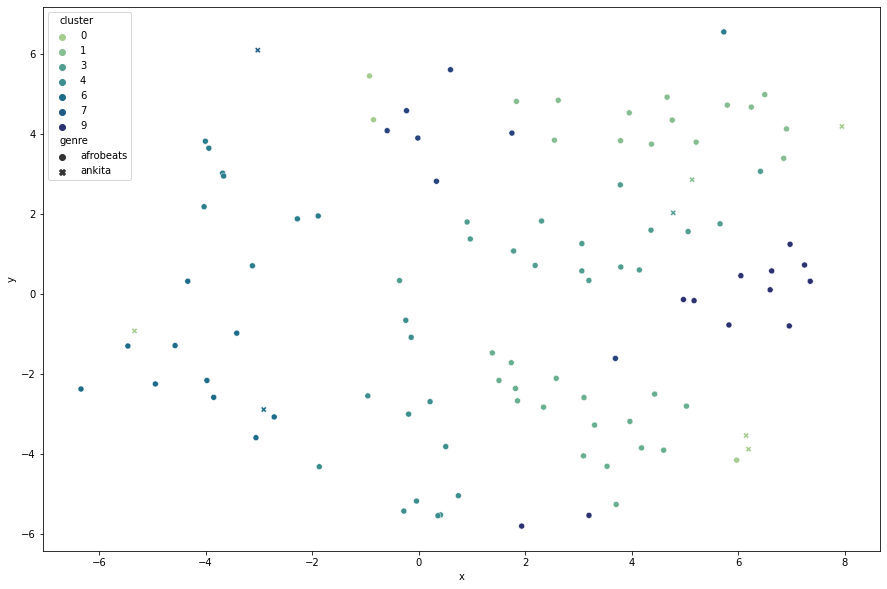

In [15]:
plt.figure(figsize=(15,10))
sns.scatterplot( x=tsne_df['x'], y=tsne_df['y'], hue=tsne_df['cluster'],style=tsne_df['genre'], palette='crest');

#### This function gives the songs in each cluster

In [16]:
tsne_df[tsne_df['genre']=='ankita']

,x,y,genre,cluster,track_name
100,4.783331,2.037118,ankita,3,"Haan Main Galat (From ""Love Aaj Kal"")"
101,5.137607,2.864691,ankita,1,Badal Pe Paon Hai
102,6.196960,-3.871085,ankita,0,Ziddi Dil
103,-2.907601,-2.879089,ankita,6,Dangal
104,7.951136,4.196271,ankita,0,Pray For Me (with Kendrick Lamar)
105,-5.333324,-0.914109,ankita,0,Blinding Lights
106,-3.018564,6.102607,ankita,7,RAINY NIGHT IN TALLINN
107,6.151970,-3.528514,ankita,0,Zinda


In [302]:
X.columns

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [256]:
def get_song(df,title):
    cluster = df.loc[df['track_name'] == title, 'cluster'].iloc[0]
    lst=[]
    for i in range(len(df)):
        if df.loc[i]['cluster'] == cluster:
            lst.append(df.loc[i]['track_name'])
    return lst, cluster

In [257]:
get_song(tsne_df, 'Priest')

(['Bumper To Bumper',
  'Swagger',
  'Tonight',
  'Ajeei (feat. Nana Boroo & Sarkodie)',
  'Caro (feat. Lax)',
  'Mo Gbono Feli Feli',
  'U Go Kill Me (feat. El)',
  'Final (Baba Nla)',
  'Premier Gaou',
  'Odo',
  'Wadi Mi Sika',
  'Dance For Me (Eugy X Mr Eazi)',
  'Skelewu',
  'Chop My Money - Remix',
  'Akube',
  'Takeover',
  'Antenna - UK Club Mix',
  'Ojuelegba',
  'Mad Over You',
  'Kontrol',
  'Askamaya',
  'Dumebi',
  'Wololo',
  'Priest',
  'THATS WHAT I WANT',
  'Bloody Samaritan',
  'Sophie Bijoux',
  'La playa del sol',
  'So Done',
  'Rock This Party',
  'Power of Rhythm - Casati Remix',
  'Start Again - Casati Remix',
  "Let's Do It Together - Casati SuperFresh Remix"],
 4)